In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Name and movies datasets

For this project we decided to work on the CMU movie dataset containing metadata extracted from Freebase, including Movie metadata like Movie box office revenue, genre, release date, runtime, and language but also Character metada like character names and aligned information about the actors who portray them, including gender and estimated age at the time of the movie's release. 
First let's see what the 2 metadasets contains.

#### Characters
The dataset contains informations  450,669 characters aligned to the movies such as Wikipedia movie ID,  Freebase movie ID, Movie release date, Character name, Actor date of birth, Actor gender, Actor height (in meters), Actor ethnicity,Actor name, Actor age at movie release, Freebase character/actor map ID, Freebase character ID, Freebase actor ID. 


#### Movies
The dataset contains informations on 81,741 movies such as the Wikipedia movie ID, Freebase movie ID, Movie name, Movie release date, Movie box office revenue, Movie runtime, Movie languages, Movie countries, Movie genres .



## Cleaning

The cleaning task was implement in the *clean_raw_data()* method of our different CharacterData and MovieData classes implementation (by Wikipedia Movie ID) and validated using the *check_clean_data()* method, available and shared by the 2 datasets (python inheritance).

From both metadataset, we directly oberved similar features such as Wikipedia Movie ID and Freebase Movie ID that is useful for futur merge of the 2 dataset. However, as in both datasets we saw that there were several columns containing Freebase and Wikipedia IDs for actors, characters and films, we decided to put them aside as the data is too difficult to access.

This are the different steps we applied to both datasets before merging:

Character dataset:
- Load with the right spacer.
- Rename the columns for proper understanding.
- Check the good type format : Actor date of birth and the Release Date as a datetime, and the other into objects.
- Deal with missing values : we wrote them as NaN or NaT
- Droping unwanted columns
- Checking that the cleaning was made

Movie dataset :
- Load with the right spacer.
- Rename the columns for proper understanding.
- Modify the Language, Country and Genre columns:  the information was a JSON format not readable nor accessible so we isolate the information and replace it by a human-readable string format.
- Modify the datatypes of movie runtime into timedelta and the release date into a datetime object for further manipulation.
- Modify the movie Name, Language, Country and Genre:  we checked that they were in object type and modified them if not.
- Deal with missing values : we wrote them as NaN or NaT
- Dropping the unwanted columns
- Check that the cleaning was made


We kept the whole dataset with NaN and NaT values in a specific file to keep features that could be interesting even if the rate of missing values is very high (such as etchnicity or Box office revenue). However, for the following notebook, to make some we decided to remove this 2 columns since they have more than 70% missing values.


## Demo

Here, we will import and clean the data base to demonstrate the process.


In [10]:
# imports my code from the file src/data/movies_char_data.py
import src.data.movies_char_data as MovieChar

#### Characters 

In [11]:
character_df = MovieChar.CharacterData("Character", "character.metadata.tsv", output_name = "character_data_clean.csv")
character_df.raw_df.head()

Character : loaded 450668 rows !


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft


In [12]:
# print duplicated rows
character_df.clean_raw_data()
character_df.clean_df.head()

Character : Cleaning the raw data


,Wikipedia_movie_ID,Release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,975900,2001-08-24,LIEUTENANT MELANIE BALLARD,1974-08-15,F,1.780,NATASHA HENSTRIDGE,27.0
1,975900,2001-08-24,DESOLATION WILLIAMS,1969-06-15,M,1.727,ICE CUBE,32.0
2,975900,2001-08-24,SGT JERICHO BUTLER,1967-09-12,M,1.750,JASON STATHAM,33.0
3,975900,2001-08-24,BASHIRA KINCAID,1977-09-25,F,1.650,CLEA DUVALL,23.0
4,975900,2001-08-24,COMMANDER HELENA BRADDOCK,1949-05-26,F,1.727,PAM GRIER,52.0


In [13]:
character_df.pipeline()

Character : loaded 450668 rows !
Character : Cleaning the raw data
Character : Clean data has been and saved to data/clean/movies_char/character_data_clean.csv! (171826 rows)


####  Movie dataset

In [14]:
movie_df = MovieChar.MovieData("Movie", "movie.metadata.tsv", output_name = "movie_data_clean.csv")

#Display name and file_name
print(movie_df.name, movie_df.file_name)

movie_df.raw_df.head()

Movie : loaded 81740 rows !
Movie movie.metadata.tsv


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [15]:
# print duplicated rows
movie_df.clean_raw_data()
movie_df.clean_df.head()

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
1,28463795,Brun bitter,NaT,NaN,0 days 01:23:00,Norwegian,Norway,"Crime Fiction, Drama"
2,9363483,White Of The Eye,NaT,NaN,0 days 01:50:00,English,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
3,261236,A Woman in Flames,NaT,NaN,0 days 01:46:00,German,Germany,Drama
4,13696889,The Gangsters,1913-05-29,NaN,0 days 00:35:00,"Silent film, English",United States of America,"Short Film, Silent film, Indie, Black-and-whit..."


In [16]:
movie_df.pipeline()

Movie : loaded 81740 rows !
Movie : Clean data has been and saved to data/clean/movies_char/movie_data_clean.csv! (81740 rows)


## Merging Movie and Character into one dataset

We merged the 2 dataset following the Wikipedi movie ID.

In [17]:
from src.utils.movies_utils import *

mov_char_data = merge_movies_characters_data(movie_df, character_df)

mov_char_data.head() # When we call the data name object, it returns the cleaned data

Duplicates found: 412 duplicates ! removing them...


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.85,CLIFF DEYOUNG,55.0
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.63,JUDI EVANS,35.0


In [18]:
# Print size of the dataset
print(mov_char_data.shape)

(171400, 14)


## Feature Visualization

Lets visualize the different information from the datasets.

In [ ]:
from src.utils.data_utils import *

In [ ]:
# Number of Nan values in the Movies & Character dataset
mov_char_data.isna().sum()

In [ ]:
# Visualizing the number of missing values per columns
nan_percentage = mov_char_data.isnull().mean().sort_values(ascending=False)

# Plot the percentage of NaN values per column
ax = nan_percentage.plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Percentage of NaN values')
plt.title('Percentage of NaN values in % per column', fontsize=20)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

This graph illustrates the distribution of columns based on the percentage of NaN values present in each. It helps us understand how missing data is spread across different features, highlighting columns with higher or lower levels of incompleteness

Top 50 movies revenue 
This graph displays the top 50 movies based only on the revenue.

## Trend evaluation
To assess what impact a movie had on child naming, we first try a simple model that computes the average count of babies named like a character 5 years before and 5 years after the movie's release, and compute their difference. The higher it is, the higher the trend the year the film was released.

Here is a demo of the model printing the top10 trend-inducing character names

### Determining if a movie is a blockbuster with IMDB

In [23]:
from src.models.trend_evaluation import trend_eval_ranking
from src.models.imdb_manipulation import get_movie_votes, merge_imdb_and_dataset, is_blockbuster
import pandas as pd


In [2]:
# Get the IMDB votes for the movies (Warning : might take a few minutes, nearly 700K rows !)
imdb_votes = get_movie_votes("data/raw/imdb")
imdb_votes.head()


There are 699357 movies in the imdb dataset.
There are 1507095 movies in the title dataset.
There are 321461 movies in the title-basic merged dataset before treating duplicates.


,primaryTitle,weightedAverageRating,totalVotes
0,!Women Art Revolution,6.9,262.0
1,#1 Serial Killer,5.6,73.0
2,#1915House,3.4,20.0
3,#5,4.7,21.0
4,#50Fathers,3.7,12.0


#### Blockbuster


In [6]:
# Looking for blockbuster:

# Apply the function to the DataFrame
imdb_votes['isBlockbuster'] = imdb_votes.apply(is_blockbuster, axis=1)

# Display the top 10 movies with the most votes
imdb_votes.sort_values('totalVotes', ascending=False).head(10)


,primaryTitle,weightedAverageRating,totalVotes,isBlockbuster
247302,The Shawshank Redemption,9.3,2971050.0,True
226953,The Dark Knight,9.0,2952379.0,True
108105,Inception,8.8,2619982.0,True
79354,Fight Club,8.8,2403489.0,True
82601,Forrest Gump,8.8,2324952.0,True
182204,Pulp Fiction,8.9,2280958.0,True
109329,Interstellar,8.7,2211329.0,True
239992,The Matrix,8.7,2108846.0,True
232097,The Godfather,9.2,2072334.0,True
238458,The Lord of the Rings: The Fellowship of the Ring,8.9,2063322.0,True


In [5]:
# information about the dataset distribution mean, median, std, min, max
imdb_votes.describe()

,weightedAverageRating,totalVotes
count,284599.000000,2.845990e+05
mean,6.174532,4.092329e+03
std,1.379189,3.916896e+04
min,1.000000,5.000000e+00
25%,5.300000,1.900000e+01
50%,6.300000,6.300000e+01
75%,7.100000,3.390000e+02
max,10.000000,2.971050e+06


The thresholds were chosen based on the distribution of totalVotes and weightedAverageRating in the dataset. To classify movies as blockbusters, we focused on the top 10% of films in terms of popularity (totalVotes > 100,000) and high-quality ratings (weightedAverageRating >= 7.5), ensuring that the classification aligns with generally accepted definitions of blockbusters in the film industry.

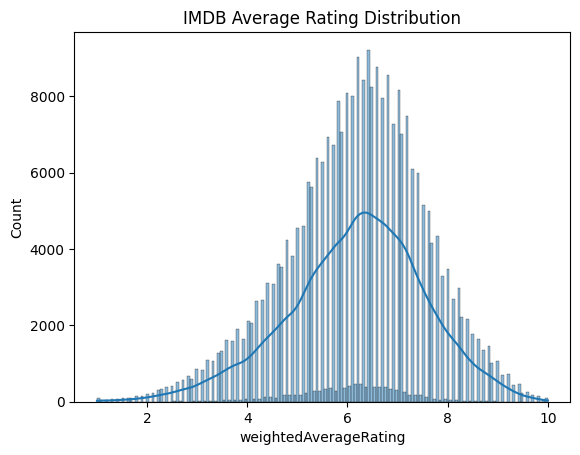

In [21]:
# visualizing the weighted average rating distribution
sns.histplot(imdb_votes['weightedAverageRating'], kde=True)
plt.title('IMDB Average Rating Distribution')
plt.show()

### Merging the IMDB dataset with mov_char_data

In [25]:
# Merging the IMDB votes and rating with the dataset of movie names
def merge_imdb_and_dataset(imdb_df, characters_df, datapath):
    """
    Function to merge the imdb data with the characters data
    :param imdb_df: DataFrame
    :param characters_df: DataFrame
    :return: DataFrame
    """
    print("Size of imdb dataset before merging: ", imdb_df.shape)
    print("Size of mov_char_data dataset before merging: ", characters_df.shape)
    char_rating = characters_df.merge(
        imdb_df, 
        left_on='Movie_name', 
        right_on='primaryTitle', 
        how='left'
    )
    char_rating = char_rating.drop_duplicates()

    # save in a new csv file
    char_rating.to_csv(f'{datapath}/merged_imdb_mov_char.csv', index=False)

    print(f"There are {char_rating.shape[0]} rows in the merged dataset")
    return char_rating

expanded_df = merge_imdb_and_dataset(imdb_votes, mov_char_data, "data/raw/imdb")
expanded_df.head(10)



Size of imdb dataset before merging:  (284599, 5)
Size of mov_char_data dataset before merging:  (171400, 14)
There are 171400 rows in the merged dataset


,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_name,Actor_age,primaryTitle,weightedAverageRating,totalVotes,isBlockbuster,is_blockbuster
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",POLICE OFFICER,NaT,M,NaN,ALLEN CUTLER,NaN,NaN,NaN,NaN,NaN,NaN
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",REPORTER,1956-12-19,F,NaN,ALICE BARRETT,43.0,NaN,NaN,NaN,NaN,NaN
2,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",FBI PROFILER ROBERT HANKS,1950-01-05,M,NaN,ROBERT CATRINI,50.0,NaN,NaN,NaN,NaN,NaN
3,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JOHN RAMSEY,1945-02-12,M,1.850,CLIFF DEYOUNG,55.0,NaN,NaN,NaN,NaN,NaN
4,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",PATSY RAMSEY,1964-07-12,F,1.630,JUDI EVANS,35.0,NaN,NaN,NaN,NaN,NaN
5,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0 days 01:35:00,English,United States of America,"Mystery, Biographical film, Drama, Crime Drama",JONBENET RAMSEY,NaT,F,NaN,JULIA GRANSTROM,6.0,NaN,NaN,NaN,NaN,NaN
6,13696889,The Gangsters,1913-05-29,NaN,0 days 00:35:00,"Silent film, English",United States of America,"Short Film, Silent film, Indie, Black-and-whit...",COP,1887-03-24,M,1.780,ROSCOE ARBUCKLE,NaN,The Gangsters,5.58,50.0,False,False
7,18998739,The Sorcerer's Apprentice,NaT,NaN,0 days 01:26:00,English,South Africa,"Family Film, Fantasy, Adventure, World cinema",MORGANA,1960-03-24,F,1.727,KELLY LEBROCK,41.0,The Sorcerer's Apprentice,6.10,174068.0,False,False
8,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,0 days 01:46:00,English,United States of America,"Musical, Comedy, Black-and-white",ROGER GRANT AKA ALEXANDER,1914-05-05,M,1.820,TYRONE POWER,24.0,Alexander's Ragtime Band,6.80,2361.0,False,False
9,6631279,Little city,1997-04-04,NaN,0 days 01:33:00,English,United States of America,"Romantic comedy, Ensemble Film, Comedy-drama, ...",REBECCA,1964-01-13,F,1.700,PENELOPE ANN MILLER,33.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# make a new dataframe from mov_char_data with only the Movie_name
movie_name_df = mov_char_data[["Movie_name","Wikipedia_movie_ID"]]
print(movie_name_df.shape)
movie_name_df.head()


In [ ]:
# remove duplicate from the movie_name_df
movie_name_df = movie_name_df.drop_duplicates()
print(movie_name_df.shape)
movie_name_df.head()

In [ ]:
# Merging the IMDB votes and rating with the dataset of movie names
merge_with_rating = merge_with_characters(imdb_titles, movie_name_df)
print(merge_with_rating.shape)
merge_with_rating.head(10)


In [ ]:
# Duplicate for movie because there are votings from different countries so we need to aggregate the data

aggregated_data = merge_with_rating.groupby('primaryTitle').apply(
    lambda group: pd.Series({
        'weightedAverageRating': (group['numVotes'] * group['averageRating']).sum() / group['numVotes'].sum(),
        'totalVotes': group['numVotes'].sum()
    })
).reset_index()

# Display the result
aggregated_data.sort_values('weightedAverageRating', ascending=False).head(10)

In [ ]:
aggregated_data.sort_values('totalVotes', ascending=False).head(10)

In [ ]:
# Filter for blockbusters
blockbusters = aggregated_data[aggregated_data['isBlockbuster']]
blockbusters.sort_values('weightedAverageRating', ascending=False).head(10)

### Emile


In [ ]:
from src.models.trend_evaluation import trend_eval_ranking
from src.models.imdb_manipulation import get_movie_votes, merge_with_characters

# Get the IMDB votes for the movies (Warning : might take a few minutes, nearly 700K rows !)
imdb_titles = get_movie_votes("data/raw/imdb")
# Merge the movies and characters data with the IMDB votes
char_rating = merge_with_characters(imdb_titles, mov_char_data)



In [ ]:
def merge_with_characters(imdb_df, characters_df):
    """
    Function to merge the IMDb data with the characters data.
    Ensures no duplicate rows are added and only matches with `Movie_name` in `characters_df` are considered.
    :param imdb_df: DataFrame
    :param characters_df: DataFrame
    :return: DataFrame
    """
    # Merge based on primaryTitle
    char_rating = characters_df.merge(
        imdb_df[['primaryTitle', 'averageRating', 'numVotes']], 
        left_on='Movie_name', 
        right_on='primaryTitle', 
        how='left'
    )
    # Drop the redundant 'primaryTitle' column
    char_rating = char_rating.drop(columns=['primaryTitle'])
    
    # Merge based on originalTitle to fill missing data
    char_rating = char_rating.merge(
        imdb_df[['originalTitle', 'averageRating', 'numVotes']],
        left_on='Movie_name',
        right_on='originalTitle',
        how='left',
        suffixes=('_primary', '_original')
    )
    # Use primary title data if available, otherwise fallback to original title
    char_rating['averageRating'] = char_rating['averageRating_primary'].combine_first(char_rating['averageRating_original'])
    char_rating['numVotes'] = char_rating['numVotes_primary'].combine_first(char_rating['numVotes_original'])
    
    # Drop temporary columns
    char_rating = char_rating.drop(columns=['originalTitle', 'averageRating_primary', 'averageRating_original', 'numVotes_primary', 'numVotes_original'])

    print(f"There are {char_rating.shape[0]} rows in the merged dataset after ensuring no duplicates are added.")
    return char_rating


In [ ]:
# studing the number of nan in the rating column
char_rating.isna().sum() 

# Printing and visualizing the year of which the movies that have Nan value in the averageRating colum are released
nan_rating = char_rating[char_rating['averageRating'].isna()]
nan_rating['Release_date'] = nan_rating['Release_date'].apply(lambda x: x.year)
nan_rating['Release_date'].value_counts().sort_index().plot(kind='bar', figsize=(16, 8), color='skyblue')
plt.ylabel('Number of movies with NaN averageRating')
plt.xlabel('Release_date')
plt.title('Number of movies with NaN averageRating per year', fontsize=20)
plt.show() 

In [ ]:
# create a dataset with the movies that have a rating
char_rating_cleaned = char_rating.dropna(subset=['averageRating'])

#what is the size of the dataset
print(char_rating_cleaned.shape)


In [ ]:
# Ranking top 10 influencing character names by trend increase
ranking = trend_eval_ranking(global_names.clean_df, char_rating)
print(ranking[["Character_name","movie_name","release_year"]].head(10))

### Trend visualisation
Using the previously computed trend-inducing movies, we can now plot the baby name popularity over time with a red line on the year of the most influential movie for this name.

Note that we need to indicate the name in uppercase for compatibility with name datasets and add the gender M/F to avoid confusion for androgenous names.

In [ ]:
from src.models.trend_evaluation import plot_trend

plot_trend("NEO", "M", ranking, global_names.clean_df)

## Name prediction

To answer our research questions, we needed to find a method to determine if after a specific date, the count of name would follow an abnormal evolution.

There are multiple ways to do it and for our first tentative, we decided to try interrupted time series.

### ITS - Interrupted time series
The concept is rather simple: at a specific point in time, we split our measurements in two parts and use the first one to train a model. This model will try to predict what the evolution would have been based on the previous behaviour and once we get it, we can compare it with the second part of the data that we kept. 

As mentioned in the explanation, we need to chose a model for this and after some researches, we decided to try the two following ones.

We are still evaluating how well they are suited for our project, since the training sample is quite limited due to the granularity of the data. (Count is by year)

#### SARIMA - Seasonal Autoregressive Integrated Moving Average
Well known model for univariate time series forecasting, SARIMA is an extension of the ARIMA model and adds the support for time series with a seasonal behaviour in addition to the trend support of ARIMA. 

In [ ]:
from src.models.naming_prediction import predict_naming_ARIMA

prediction = predict_naming_ARIMA(global_names, "LUKE", 1976, 10, True)

Here we asked our SARIMA model to forecast the counts for the name "Luke" from the year after the year 1976, which is when the first Star Wars movie was released. 

We can see that the the modelled curve has a slower growth than the actual one and this can be used to show an abnormal evolution of the count.

#### Prophet
Developped by Facebook, Prophet is a fully automatic procedure made for time series forecasting that is used in various context due it's wide range of features (seasonality, holidy effect, ...)   

In [ ]:
from src.models.naming_prediction import predict_naming_prophet

prediction = predict_naming_prophet(global_names, "LUKE", 1976, 10, True)

This time, we use Facebook's Prophet to forecast the counts for the same parameters and we can already see a difference between the two models. Prophet is generally more resistant to outliers and here, this leads to a more important difference between the modelled data and the actual one.

For now, those are only observations and we'll be investigated more thoroughly in the following days

#### Model conclusion
We still need to compare the two models and see if the ITS approach would be beneficial for our project since other options are available.